In [79]:
import tensorflow as tf
import zipfile
import os


# Extracting Dataset

In [80]:
import zipfile
import os

# -------------------
# Step 1: Paths
# -------------------
zip_path = "train.zip"           # Tumhara ZIP file
extract_path = "/content/dataset_train"  # Jahan extract karna hai
os.makedirs(extract_path, exist_ok=True)

# -------------------
# Step 2: Extract ZIP
# -------------------
try:
    # Check if the file exists before attempting to open as zip
    if not os.path.exists(zip_path):
        print(f"Error: The file '{zip_path}' was not found. Please ensure it's uploaded.")
    else:
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall(extract_path)

        print("ZIP extracted at:", extract_path)

        # -------------------
        # Step 3: Check folder structure
        # -------------------
        for root, dirs, files in os.walk(extract_path):
            print(root, dirs, len(files))

except zipfile.BadZipFile:
    print(f"Error: The file '{zip_path}' is not a valid ZIP file.")
    print("Please ensure that 'train.zip' is a complete and uncorrupted ZIP archive.")
    print("You might need to re-upload or re-download the file.")
except Exception as e:
    print(f"An unexpected error occurred during zip extraction: {e}")


ZIP extracted at: /content/dataset_train
/content/dataset_train ['normal', 'opacity'] 0
/content/dataset_train\normal [] 1082
/content/dataset_train\opacity [] 3110


In [81]:
v = "/content/dataset_train"
# storing our training dataset
# in  v variable

In [82]:
import os, random

v = "/content/dataset_train"
normal_images = random.sample(os.listdir(os.path.join(v, "normal")), 2)
opacity_images = random.sample(os.listdir(os.path.join(v, "opacity")), 2)

print("Normal:", normal_images)
print("Opacity:", opacity_images)


Normal: ['NORMAL2-IM-0475-0001.jpeg', 'IM-0477-0001.jpeg']
Opacity: ['person1120_virus_1845.jpeg', 'person969_virus_1643.jpeg']


# Lung Vision Visualization

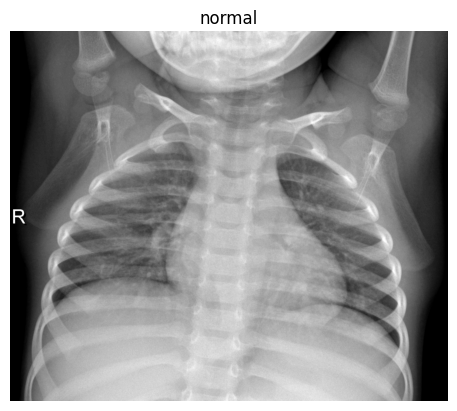

In [83]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
N = "/content/dataset_train/normal"

for i in random.sample(os.listdir(N), 1):
    plt.imshow(mpimg.imread(os.path.join(N, i)), cmap='gray')
    plt.title("normal")
    plt.axis('off')
    plt.show()

# by this  images we can clearly see that unhealthy or they  Pneumonia
# effected lung is more whitish than  normal lungs
# its  because opacity lungs may contain fluids ...
# while normal lungs is filled with  airs (oxygen and carbon dioxides)


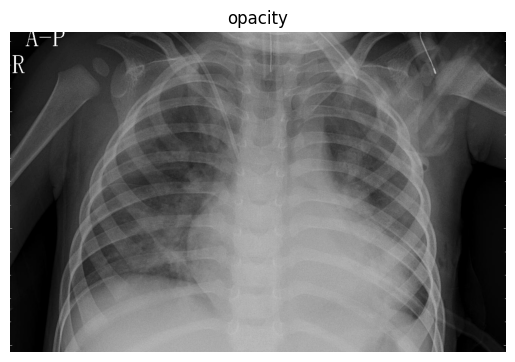

In [84]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg

O = "/content/dataset_train/opacity"

for i in random.sample(os.listdir(O), 1):
    plt.imshow(mpimg.imread(os.path.join(O, i)), cmap='gray')
    plt.title("opacity")
    plt.axis('off')
    plt.show()


# Shape

In [85]:
# import os

normal_count = len(os.listdir("/content/dataset_train/normal"))
opacity_count = len(os.listdir("/content/dataset_train/opacity"))

print("Normal images:", normal_count)
print("Opacity images:", opacity_count)
# opacity_count
# normal_count , opacity_count



Normal images: 1082
Opacity images: 3110



# Making Folders for training and Validations

In [86]:
# importing important libraries for making folder .
import os
import shutil
from sklearn.model_selection import train_test_split


# making 1 folders inside train directory
# and 1 folder inside val directory
# folders name are normal and opacity
train_dir = "/content/train" # we are just assigning  path its not prespecified.
val_dir   = "/content/val"


# train_dir = variable name
# "/content/train" =  specifying the path where image will be placed.


# Creating new folders

  # train_dir = "/content/train"
os.makedirs(f"{train_dir}/normal", exist_ok=True)
os.makedirs(f"{train_dir}/opacity", exist_ok=True)


     # val_dir   = "/content/val"
os.makedirs(f"{val_dir}/normal", exist_ok=True)
os.makedirs(f"{val_dir}/opacity", exist_ok=True)



# For normal images ...
normal_images = os.listdir(N) # making a normal image list in
# normal_images
train_n, val_n = train_test_split(normal_images, test_size=0.2, random_state=42)

for img in train_n: # here we are copying normal
# images into  train_n
    shutil.copy(f"{N}/{img}", f"{train_dir}/normal")

for img in val_n: # here we are copying normal images
# into val_n.
    shutil.copy(f"{N}/{img}", f"{val_dir}/normal")




# For opacity images
opacity_images = os.listdir(O)
train_o, val_o = train_test_split(opacity_images, test_size=0.2, random_state=42)

for img in train_o:
    shutil.copy(f"{O}/{img}", f"{train_dir}/opacity")

for img in val_o:
    shutil.copy(f"{O}/{img}", f"{val_dir}/opacity")




# Split output

In [87]:
print("Train normal:", len(os.listdir(f"{train_dir}/normal")))
print("Train opacity:", len(os.listdir(f"{train_dir}/opacity")))
print("Val normal:", len(os.listdir(f"{val_dir}/normal")))
print("Val opacity:", len(os.listdir(f"{val_dir}/opacity")))


Train normal: 865
Train opacity: 2488
Val normal: 217
Val opacity: 622


# Data Loading and Preprocessing

In [88]:
# Step 1: Importing Importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import matplotlib.pyplot as plt

# Step 2: Setting path (according to my folder)
train_dir = '/content/train'      
val_dir   = '/content/val'       

# Step 3: loading dataset 
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical',    
    shuffle=True,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=16,
    label_mode='categorical',
    shuffle=False
)
# creating cache  for validation for speed ooptimization
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3353 files belonging to 2 classes.
Found 839 files belonging to 2 classes.


# Data Augmentation

In [89]:
# Step 4:  Layer for Data Augmentation 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.10),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(factor=0.2),
    layers.RandomTranslation(0.1, 0.1),
    layers.GaussianNoise(0.05),
])

# Loading Pretrained Model (DenseNet121)

In [90]:
base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
       # Means we are removing last layer of                              
         # image net ..last layer means
         # classifing or giving output probability
         # for classes ..we are removing because 
         # we do not want the probabiliy of imagenet
         # dataset. we just want to 
         # learn the faetures , edges from
         # other dataset . we turned off the last layer 
         # of this because we will use last layer (our custom layer)
         # for our dataset to tune the model 


# Defining CallBack

In [91]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
    tf.keras.callbacks.ModelCheckpoint("S_model.keras", save_best_only=True, monitor="val_loss")
]

# Patience  = 7 means ,  epoch = 7 ..its is threshhold. , if 
# there is no change in accuracy in next 7 epoch model will 
# be stopped from being trained.

#            ReduceLROnPlateau =  If from first 3 epoch
#                                 there is no major change
#                   trainig accuracy or validation then ...it will
#                   halfen the assigned the learning rate ...
#                   if there is still a problem in next 4 epoch
#                   means there is no major change in next 4 epochs 
#                   then ..it will copletely stopped the model 
#                   from being train .

# Model Architecture

In [92]:

num_classes = len(os.listdir(train_dir)) # here we are defining number 
                                         # of classes . 


  
# our  convolution architeture.
# our last layer which i have to train .

model = Sequential([
    layers.Input(shape=(224,224,3)),
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,       # our pretrained model base layer added here
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax') 
])

# code :
     # layers.Dense(num_classes, activation='softmax') 

# explanation : 

#  Last layer → this  layer is known as last layer :
# this  is ihe ouput  layer of my dataset ..

# This last layer roughly decides which class an image belongs to.
# Basically, it maps the features 
# extracted by the base model (edges, textures, patterns)
# to the class labels of your dataset.
# During the first 5 epochs, 
# it only performs this initial adjustment, 
# serving as a basic mapping between features and labels.



# 512 nuerons means 512 diffrent observaton in just 
# one image.


# important 
          # we can  replace num_classes to 4.

# Compiling and Training The Last Layer.

In [93]:
# Step 0: class weights
class_weights = {
    0: 1.66,   # Normal
    1: 1.0     # Pneumonia
}



base_model.trainable = False # Our pretrained base model layer
                             # which will not be updated while 
                             # compiling

model.compile(         
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

   # Here we have done base model(efficientNet B3)
   # false Because we do not want retrain the 
   # the base model or update. 
   # it already trained and have 
   # the Knowledges of Features , edges on Millions of images 
   # Dataset. So that why we turned Base Model false .

 # in  inside our model base model is already included 

# Fitting The Last Layer

In [94]:
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs = 5, 
                    class_weight=class_weights,    
                    callbacks=callbacks)


# here we are fitting the compilation.
#  in this we have  already freezed the base model 


# here we have given only 5 epochs because
# This last layer roughly decides which class an image belongs to.

# Basically, it maps the features extracted
# by the base model (edges, textures, patterns) 
# to the class labels of your dataset.

# During the first 5 epochs,
# it only performs this initial adjustment,
# serving as a basic mapping between features and labels.

Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 146s 635ms/step - accuracy: 0.8783 - loss: 0.3556 - val_accuracy: 0.8927 - val_loss: 0.2440 - learning_rate: 5.0000e-04
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 122s 579ms/step - accuracy: 0.9177 - loss: 0.2653 - val_accuracy: 0.9404 - val_loss: 0.1726 - learning_rate: 5.0000e-04
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 122s 582ms/step - accuracy: 0.9195 - loss: 0.2528 - val_accuracy: 0.8915 - val_loss: 0.3267 - learning_rate: 5.0000e-04
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 122s 581ms/step - accuracy: 0.9213 - loss: 0.2346 - val_accuracy: 0.8951 - val_loss: 0.3021 - learning_rate: 5.0000e-04
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 121s 578ms/step - accuracy: 0.9326 - loss: 0.2042 - val_accuracy: 0.9166 - val_loss: 0.2706 - learning_rate: 5.0000e-04


# Fine-Tuning (Unfreeze Last Layers)

In [95]:
base_model.trainable = True
fine_tune_at = 100 # here we are freezing the first 100 layer 
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

fine_tune_at = 100 

  # exlanation:
# We are freezing the first 100 layers of the base model because 
# these bottom layers detect simple features (edges, colors, textures) 
# which are already learned and do not need retraining.

# Now, only the top layers of the base model will be trainable.
# These top layers detect complex patterns, and they will adapt to 
# our dataset to recognize its specific complex features.
# We assigned these top layers because they already have knowledge 
# of complex patterns from pre-training and can easily adjust 
# to our dataset.

# Final Compilation for Last Layer

In [96]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Final Fitting for Last Layer

In [97]:
fine_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights 
)

# here we are training the top layers 
# of our model ....this top layers 
# is of base model (pretrained model)
# this layer is already have knowledge 
# of complex features .

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.9210 - loss: 0.2603 - val_accuracy: 0.9404 - val_loss: 0.1855 - learning_rate: 1.0000e-04
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.9493 - loss: 0.1640 - val_accuracy: 0.9499 - val_loss: 0.1473 - learning_rate: 1.0000e-04
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.9618 - loss: 0.1266 - val_accuracy: 0.9356 - val_loss: 0.1657 - learning_rate: 1.0000e-04
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9681 - loss: 0.1104 - val_accuracy: 0.9571 - val_loss: 0.1229 - learning_rate: 1.0000e-04
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9693 - loss: 0.0903 - val_accuracy: 0.9702 - val_loss: 0.0745 - learning_rate: 1.0000e-04
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9729 - loss: 0.0893 - val_accuracy: 0.9690 - val_loss: 0.0700 - learning_rate: 1.0000e-04
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - acc

# Loading Test Data

In [110]:
import zipfile
import os

zip_path = "test.zip"          # pasted zip path
extract_path = "/content/PuenomiaTestset"    # we have to extract
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done! Files are in:", extract_path)

Extraction done! Files are in: /content/PuenomiaTestset


In [111]:
test_dir = "/content/PuenomiaTestset/test"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False  #  here we are not shuffling test file 
)

Found 624 files belonging to 2 classes.


In [112]:
import os

test_dir = "/content/PuenomiaTestset/test"
classes = ["NORMAl", "PNEUMONIA"]

for cls in classes:
    path = os.path.join(test_dir, cls)   # here we are setting test directory 
    count = len(os.listdir(path))
    print(f"{cls} images:", count)

NORMAl images: 234
PNEUMONIA images: 390


# Loading final best Trained Model

In [113]:
model = tf.keras.models.load_model("S_model.keras")

# Prediction over Test Datset

In [102]:
import  numpy as np

In [114]:
test_dir = "/content/PuenomiaTestset/test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=16,
    label_mode='categorical',
    shuffle=False,
    seed=123
)

# Normalization
# test_ds = test_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
# test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Predictions
preds = model.predict(test_ds)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(np.concatenate([y for x, y in test_ds], axis=0), axis=1)

accuracy = np.mean(pred_classes == true_classes) * 100
print(f"Test Accuracy: {accuracy:.2f}%")






Found 624 files belonging to 2 classes.
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step
Test Accuracy: 87.82%


# Training Learning Curves

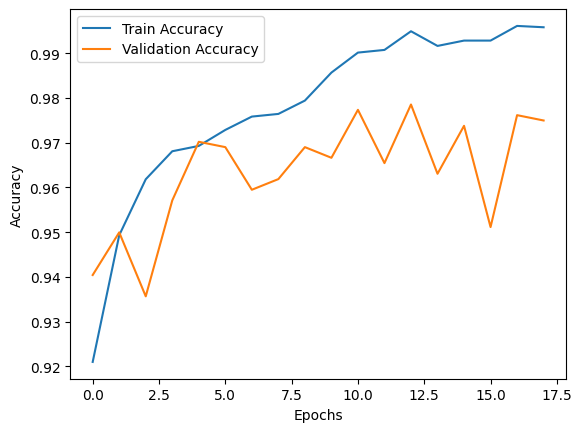

In [115]:
plt.plot(fine_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss Learning Curves

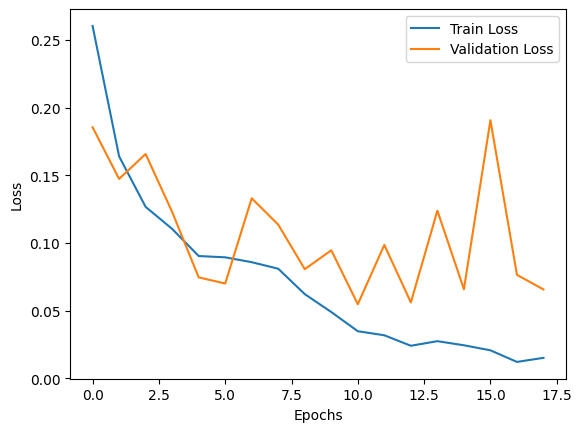

In [116]:
plt.plot(fine_history.history['loss'], label='Train Loss')
plt.plot(fine_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Confusion Matrix

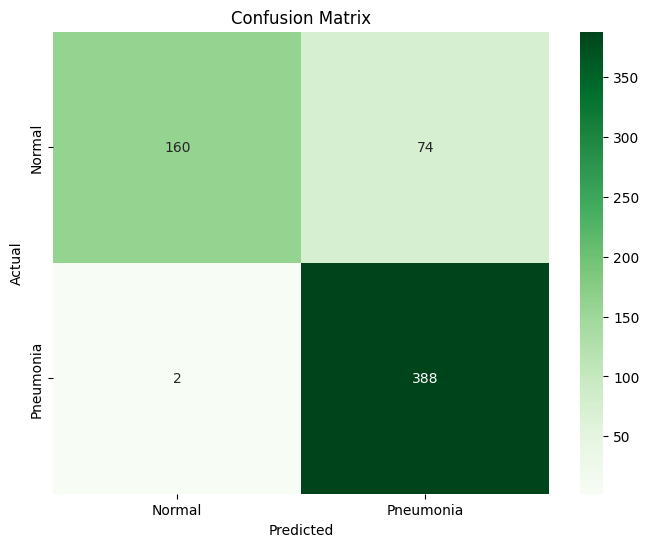

In [126]:
class_names = ["Normal","Pneumonia"]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation

In [125]:
class_names = ["Normal","Pneumonia"]

from sklearn.metrics import classification_report

print(classification_report(true_classes, pred_classes, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.99      0.68      0.81       234
   Pneumonia       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.90      0.88      0.87       624



# Saving test prediction into CSV file

In [122]:
import pandas as pd
import numpy as np

# our class names 
class_names = ["Normal","Pneumonia"]

#  Model predictions
pred_probs = model.predict(test_ds)
pred_classes = np.argmax(pred_probs, axis=1)

#  True labels
true_classes = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_classes, axis=1)

#  Convert indices to class names
true_labels = [class_names[i] for i in true_classes]
pred_labels = [class_names[i] for i in pred_classes]

#  Create DataFrame
df = pd.DataFrame({
    "True_Label": true_labels,
    "Predicted_Label": pred_labels
})

#  Save CSV
df.to_csv("Vpredictions.csv", index=False)

print("CSV file saved as Spredictions.csv")

39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 458ms/step
CSV file saved as Spredictions.csv


# Saving Classification Matrix

In [123]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Class names
class_names = ["Normal","Pneumonia"]

# True labels
true_classes = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Model predictions
pred_probs = model.predict(test_ds)
pred_classes = np.argmax(pred_probs, axis=1)

# Convert numeric labels to class names
true_labels = [class_names[i] for i in true_classes]
pred_labels = [class_names[i] for i in pred_classes]

# Classification report as dictionary
report_dict = classification_report(true_classes, pred_classes, target_names=class_names, output_dict=True)

# Creating DataFrame for metrics
metrics_df = pd.DataFrame(report_dict).transpose()

# Save classification metrics to CSV
metrics_df.to_csv("S.classification_metrics.csv", index=True)
print("Classification metrics saved as S.classification_metrics.csv")

39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step
Classification metrics saved as S.classification_metrics.csv
